In [1]:
%load_ext watermark
%watermark

2020-09-06T12:08:10-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-45-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
vehiculos = pd.read_csv("vehiculos.1.procesado_inicial.csv")
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


## Diagnostico de calidad de los datos
Antes de empezar a hacer un análisis de los datos debemos investigar que errores pueden tener los datos para que los resultados no se vean sesgados
### Duplicados
Al revisar los duplicados se busca revisar dos cosas:
* Asegurarse de que los datos que no deban estar duplicados no lo esten. (números de identificación, de telefono, etc)
* Mirar qué columnas tienen un alto número de duplicados y eliminarlas del análisis.
Las entidades posibles eran:

    Fabricante <br>
    Fabricante-modelo <br>
    Fabricante-modelo-año <br>
    fabricante-año <br>
    
de estas entidades la única que no se puede duplicar es la de fabricante-modelo-año

In [4]:
vehiculos["modelo_unico"] = vehiculos.fabricante.str.cat([vehiculos.modelo, vehiculos.year.apply(str)],sep="-")

In [5]:
vehiculos.modelo_unico.value_counts()

Jeep-Cherokee/Wagoneer-1985         24
Ford-F150 Pickup 2WD-1984           19
Chevrolet-C10 Pickup 2WD-1984       19
GMC-C15 Pickup 2WD-1984             19
Chevrolet-S10 Pickup 2WD-1984       18
                                    ..
Toyota-RAV4 EV-2013                  1
Mercury-Mountaineer FFV 2WD-2005     1
Volvo-940 SE Wagon-1991              1
Cadillac-Escalade Ext AWD-2006       1
GMC-Envoy 4WD-2002                   1
Name: modelo_unico, Length: 17448, dtype: int64

En este caso hay muchos duplicados, podemos buscar un ejemplo

In [6]:
vehiculos[vehiculos.modelo_unico == "GMC-C15 Pickup 2WD-1984"].head(10)

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,modelo_unico
15376,GMC,C15 Pickup 2WD,1984,4.1,6.0,Automatic 3-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,15,592.466667,GMC-C15 Pickup 2WD-1984
15377,GMC,C15 Pickup 2WD,1984,4.1,6.0,Automatic 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,16,555.437500,GMC-C15 Pickup 2WD-1984
15378,GMC,C15 Pickup 2WD,1984,4.1,6.0,Manual 3-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,17,522.764706,GMC-C15 Pickup 2WD-1984
15379,GMC,C15 Pickup 2WD,1984,4.1,6.0,Manual 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,17,522.764706,GMC-C15 Pickup 2WD-1984
15380,GMC,C15 Pickup 2WD,1984,5.0,8.0,Automatic 3-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14,634.785714,GMC-C15 Pickup 2WD-1984
15381,GMC,C15 Pickup 2WD,1984,5.0,8.0,Automatic 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,15,592.466667,GMC-C15 Pickup 2WD-1984
15382,GMC,C15 Pickup 2WD,1984,5.0,8.0,Manual 3-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,15,592.466667,GMC-C15 Pickup 2WD-1984
15383,GMC,C15 Pickup 2WD,1984,5.0,8.0,Manual 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,16,555.437500,GMC-C15 Pickup 2WD-1984
15384,GMC,C15 Pickup 2WD,1984,6.2,8.0,Automatic 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Diesel,19,535.789474,GMC-C15 Pickup 2WD-1984
15385,GMC,C15 Pickup 2WD,1984,6.2,8.0,Manual 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Diesel,20,509.000000,GMC-C15 Pickup 2WD-1984


Es evidente que hay algunos datos duplicados, podemos también mirar cuantos datos tenemos duplicados dentro del dataset. <br><br>
Consideramos duplicados los datos que sean totalmente iguales en sus columnas

In [7]:
vehiculos[vehiculos.duplicated()].shape

(1506, 12)

In [8]:
vehiculos = vehiculos.drop_duplicates()
vehiculos.shape

(36930, 12)

In [9]:
del vehiculos["modelo_unico"]

Miramos que columnas tienen muchos valores repetidos

In [11]:
def valores_duplicados_df(df):
    for columna in df:
        records = len(df[columna])
        repetidos = df[columna].value_counts()
        mas_comun = repetidos.iloc[0]
        menos_comun = repetidos.iloc[-1]
        print("{} | {} | {}".format(
            df[columna].name,
            round(mas_comun/records,3),
            round(menos_comun/records,3)
        ))
valores_duplicados_df(vehiculos)

fabricante | 0.1 | 0.0
modelo | 0.005 | 0.0
year | 0.038 | 0.007
desplazamiento | 0.095 | 0.0
cilindros | 0.38 | 0.0
transmision | 0.287 | 0.0
traccion | 0.353 | 0.005
clase | 0.145 | 0.0
combustible | 0.652 | 0.0
consumo | 0.097 | 0.0
co2 | 0.084 | 0.0


Hay algunos records cuyo porcentaje es alto, como los cilindros, la transmisión, y la tracción, aunque no son valores muy altos debemos analizarlos. 

In [12]:
vehiculos.traccion.value_counts(normalize=True)

Front-Wheel Drive             0.360280
Rear-Wheel Drive              0.352863
4-Wheel or All-Wheel Drive    0.177345
All-Wheel Drive               0.062325
4-Wheel Drive                 0.030886
2-Wheel Drive                 0.011402
Part-time 4-Wheel Drive       0.004899
Name: traccion, dtype: float64

La mayor parte de los vehiculos tienen tracción a dos ruedas.

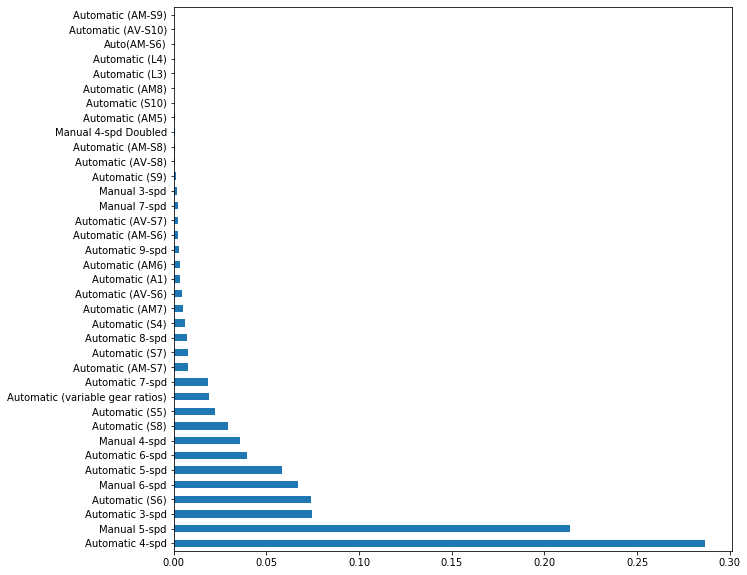

In [13]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)
vehiculos.transmision.value_counts(normalize=True).plot.barh()

/home/buitrago/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/buitrago/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


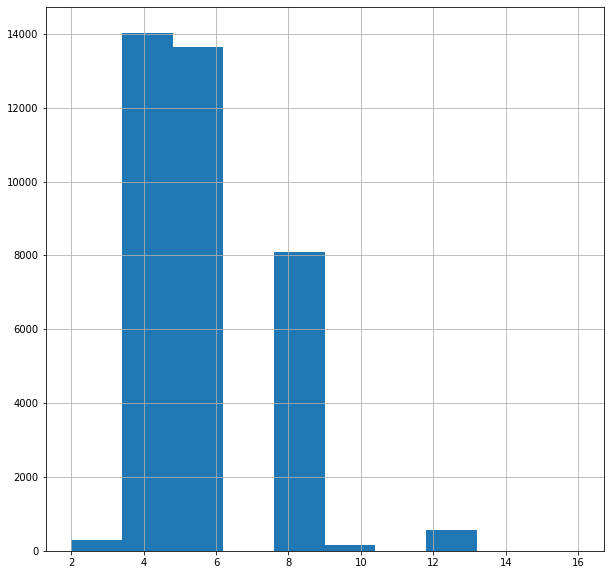

In [14]:
plt.hist(vehiculos.cilindros)
plt.grid()

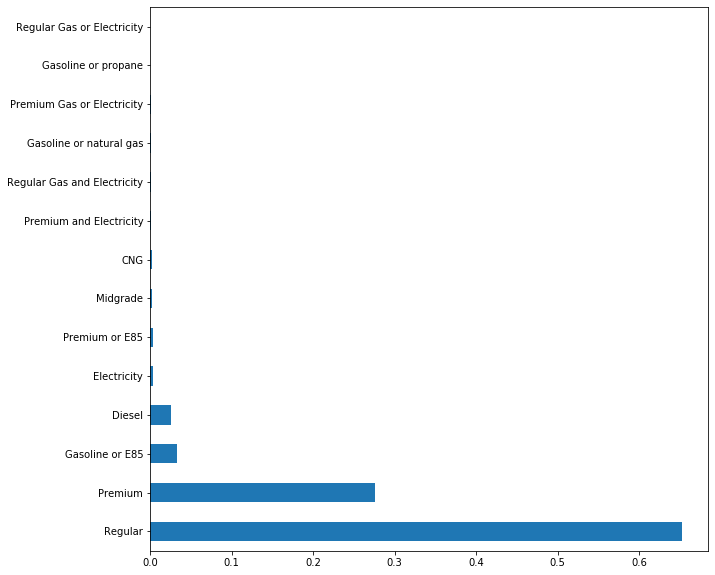

In [15]:
vehiculos.combustible.value_counts(normalize=True).plot.barh()

La columna combustible puede tener un problema de duplicación ya que gran parte del dataset tiene el mismo valor

## Valores inexistentes
Son valores que el dataFrame marca como nulos, importante diferenciar valores inexistentes por un error que los valores inexistentes porque el valor en realidad es inexistente

In [17]:
def valores_inexistentes(df):
    for columna in df:
        records = len(df[columna])
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / records, df[columna].dtype 
        ))
valores_inexistentes(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


Aunque hay algunas variables que tienen valores nulos los porcentajes son muy bajos como para decir que pueden sesgar el análisis.

## Valores Extremos (outliers)
Para detectar los valores extremos u outliers debemos calcular la puntuación Z mayor de 3, los resultados que dan 3 quiere decir que son valores que se alejan más de 3 desviaciones estandar de la media.
$$z(x)=\dfrac{x-\mu}{\sigma}$$

In [19]:
from scipy.stats import stats
import numpy as np

def outliers(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
            ))
outliers(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 233 | int64
co2 | 358 | float64


/home/buitrago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


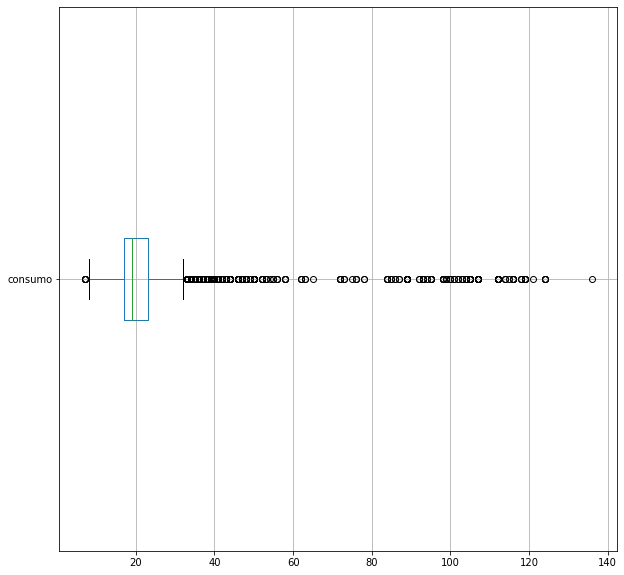

In [23]:
vehiculos.boxplot(column="consumo",vert=False)

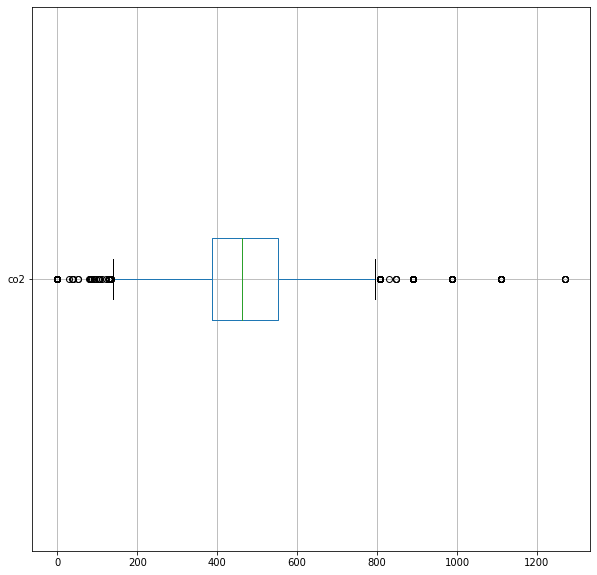

In [22]:
vehiculos.boxplot(column="co2",vert=False)

Dentro del dataset hay coches que consumen más de lo normal, otros que consumen menos de lo normal y otros que no consumen, como la variable objetivo es el "co2" podemos eliminar los coches que no consumen nada

In [26]:
vehiculos[vehiculos.co2==0].combustible.unique()

array(['Electricity'], dtype=object)

In [27]:
vehiculos.combustible.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Electricity', 'Premium Gas or Electricity',
       'Gasoline or E85', 'Gasoline or natural gas', 'CNG',
       'Regular Gas or Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

In [28]:
vehiculos_con_co2 = vehiculos[vehiculos.co2 > 0]

In [30]:
vehiculos_con_co2.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
5,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
6,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500


In [32]:
print("Outliers vehiculos no electricos:",outliers(vehiculos_con_co2))
print()
print("Valores duplicados vehiculos no electricos:",valores_duplicados_df(vehiculos_con_co2))
print()
print("Valores inexistentes:", valores_inexistentes(vehiculos_con_co2))

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 400 | int64
co2 | 221 | float64
Outliers vehiculos no electricos: None

fabricante | 0.1 | 0.0
modelo | 0.005 | 0.0
year | 0.038 | 0.007
desplazamiento | 0.096 | 0.0
cilindros | 0.381 | 0.0
transmision | 0.288 | 0.0
traccion | 0.352 | 0.005
clase | 0.145 | 0.0
combustible | 0.654 | 0.0
consumo | 0.097 | 0.0
co2 | 0.084 | 0.0
Valores duplicados vehiculos no electricos: None

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 5.43611209263135e-05 | float64
cilindros | 8.154168138947025e-05 | float64
transmision | 5.43611209263135e-05 | object
traccion | 0.021445462205430674 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64
Valores inexistentes: None


/home/buitrago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


## Conclusiones
Finalmente se deben dar conclusiones sobre lo encontrado en el dataset

## Exportar

In [34]:
vehiculos_con_co2.to_csv("vehiculos.2.limpio_analisis.csv",index=False)